In [1]:
%load_ext autoreload
%autoreload 2

In [114]:
from glob import glob 

import pandas as pd

from fastcore.xtras import load_pickle

from gptchem.settings import ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH

import matplotlib.pyplot as plt 
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use(['science', 'nature'])

%matplotlib inline

## Load results

In [137]:
all_out = glob("out/**/*.pkl")

In [138]:
all_out = [load_pickle(p) for p in all_out]

In [139]:
extracted_res = []
xgboost_results = []
tabpfn_results = []

for out in all_out: 
    try:
        res = {
            'train_size': out['train_size'],
            'frac_valid': out['frac_valid'],
            'accuracy': out['accuracy'],
            'f1_macro': out['f1_macro'],
            'f1_micro': out['f1_micro'],
            'kappa': out['kappa'],
            "num_classes": out['num_classes'],
            "representation": out['representation']
        }
        extracted_res.append(res)
    except KeyError:
        pass

    xgb_res = {
        'train_size': out['train_size'], 
        'accuracy': out['xgboost_baseline']['accuracy'], 
        'f1_macro': out['xgboost_baseline']['f1_macro'],
        'f1_micro': out['xgboost_baseline']['f1_micro'],
        'kappa': out['xgboost_baseline']['kappa'],
        "num_classes": out['num_classes']
    }

    tabpfn_res = {
        'train_size': out['train_size'], 
        'accuracy': out['tabpfn_baseline']['accuracy'], 
        'f1_macro': out['tabpfn_baseline']['f1_macro'],
        'f1_micro': out['tabpfn_baseline']['f1_micro'],
        'kappa': out['tabpfn_baseline']['kappa'],
        "num_classes": out['num_classes']
    }

   
    xgboost_results.append(xgb_res)
    tabpfn_results.append(tabpfn_res)

In [140]:
res = pd.DataFrame(extracted_res)
xgboost_res = pd.DataFrame(xgboost_results)
tabpfn_res = pd.DataFrame(tabpfn_results)

In [141]:
grouped_res = res.groupby(['num_classes', "representation", 'train_size']).agg(['mean', 'std'])

In [142]:
grouped_xgboost_res = xgboost_res.groupby(['num_classes', 'train_size']).agg(['mean', 'std'])

In [143]:
grouped_tabpfn_res = tabpfn_res.groupby(['num_classes', 'train_size']).agg(['mean', 'std'])

In [144]:
grouped_res.loc[2,:]

frac_valid       accuracy            f1_macro  \
                                mean  std      mean       std      mean   
representation train_size                                                 
InChI          10                1.0  0.0  0.565333  0.034948  0.545379   
               50                1.0  0.0  0.629333  0.026633  0.627299   
               100               1.0  0.0  0.656000  0.038158  0.653247   
               200               1.0  0.0  0.673333  0.040857  0.672112   
               500               1.0  0.0  0.701333  0.026633  0.701074   
SELFIES        10                1.0  0.0  0.533333  0.068391  0.529356   
               50                1.0  0.0  0.606667  0.054455  0.604588   
               100               1.0  0.0  0.612000  0.018330  0.609171   
               200               1.0  0.0  0.649333  0.018903  0.645970   
               500               1.0  0.0  0.690667  0.050013  0.690592   
SMILES         10                1.0  0.0  0.577333  0.047385  0.547116   
               50                1.0  0.0  0.636000  0.044542  0.635135   
               100               1.0  0.0  0.660000  0.026230  0.653136   
               200               1.0  0.0  0.693333  0.012220  0.690891   
               500               1.0  0.0  0.710667  0.024440  0.710493   

                                     f1_micro               kappa            
                                std      mean       std      mean       std  
representation train_size                                                    
InChI          10          0.055249  0.565333  0.034948  0.130667  0.069895  
               50          0.027523  0.629333  0.026633  0.258667  0.053267  
               100         0.038608  0.656000  0.038158  0.312000  0.076315  
               200         0.041701  0.673333  0.040857  0.346667  0.081715  
               500         0.026673  0.701333  0.026633  0.402667  0.053267  
SELFIES        10          0.061619  0.533333  0.068391  0.066667  0.136782  
               50          0.055953  0.606667  0.054455  0.213333  0.108910  
               100         0.018126  0.612000  0.018330  0.224000  0.036661  
               200         0.018835  0.649333  0.018903  0.298667  0.037807  
               500         0.050072  0.690667  0.050013  0.381333  0.100027  
SMILES         10          0.081057  0.577333  0.047385  0.154667  0.094770  
               50          0.045220  0.636000  0.044542  0.272000  0.089084  
               100         0.030317  0.660000  0.026230  0.320000  0.052460  
               200         0.012239  0.693333  0.012220  0.386667  0.024440  
               500         0.024379  0.710667  0.024440  0.421333  0.048881

In [145]:
grouped_tabpfn_res

accuracy            f1_macro            f1_micro  \
                            mean       std      mean       std      mean   
num_classes train_size                                                     
2           10          0.566000  0.025839  0.563306  0.027384  0.566000   
            50          0.575000  0.015457  0.573037  0.016050  0.575000   
            100         0.590000  0.018091  0.589205  0.018126  0.590000   
            200         0.623000  0.025132  0.622635  0.025152  0.623000   
            500         0.623636  0.057368  0.622287  0.058669  0.623636   
5           10          0.200000  0.033407  0.185941  0.040897  0.200000   
            50          0.250667  0.020298  0.241634  0.017096  0.250667   
            100         0.238667  0.028213  0.211995  0.026379  0.238667   
            200         0.268000  0.015100  0.238913  0.004429  0.268000   
            500         0.361333  0.008718  0.324399  0.008322  0.361333   

                                         kappa            
                             std          mean       std  
num_classes train_size                                    
2           10          0.025839  1.320000e-01  0.051677  
            50          0.015457  1.500000e-01  0.030913  
            100         0.018091  1.800000e-01  0.036181  
            200         0.025132  2.460000e-01  0.050265  
            500         0.057368  2.472727e-01  0.114735  
5           10          0.033407  1.156482e-17  0.041758  
            50          0.020298  6.333333e-02  0.025372  
            100         0.028213  4.833333e-02  0.035267  
            200         0.015100  8.500000e-02  0.018875  
            500         0.008718  2.016667e-01  0.010897

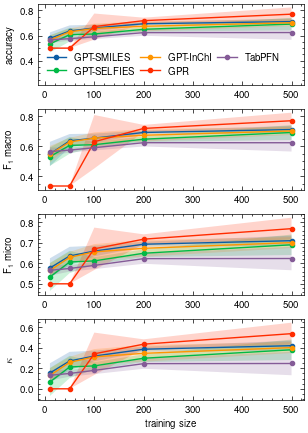

In [146]:
fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH))

# plot the binary case, i.e. num_classes = 2

for i, metric in enumerate(['accuracy', 'f1_macro', 'f1_micro', 'kappa']):
    ax[i].plot(
        grouped_res.loc[2, 'SMILES', :].index,
        grouped_res.loc[2, 'SMILES', :][metric]['mean'],
        marker='o',
        label='GPT-SMILES',
    )
    ax[i].fill_between(
        grouped_res.loc[2, 'SMILES', :].index,
        grouped_res.loc[2, 'SMILES', :][metric]['mean'] - grouped_res.loc[2, 'SMILES', :][metric]['std'],
        grouped_res.loc[2, 'SMILES', :][metric]['mean'] + grouped_res.loc[2, 'SMILES', :][metric]['std'],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_res.loc[2, 'SELFIES', :].index,
        grouped_res.loc[2, 'SELFIES', :][metric]['mean'],
        marker='o',
        label='GPT-SELFIES',
    )
    ax[i].fill_between(
        grouped_res.loc[2, 'SELFIES', :].index,
        grouped_res.loc[2, 'SELFIES', :][metric]['mean'] - grouped_res.loc[2, 'SELFIES', :][metric]['std'],
        grouped_res.loc[2, 'SELFIES', :][metric]['mean'] + grouped_res.loc[2, 'SELFIES', :][metric]['std'],
        alpha=0.2,
    )


    ax[i].plot(
        grouped_res.loc[2, 'InChI', :].index,
        grouped_res.loc[2, 'InChI', :][metric]['mean'],
        marker='o',
        label='GPT-InChI',
    )
    ax[i].fill_between(
        grouped_res.loc[2, 'InChI', :].index,
        grouped_res.loc[2, 'InChI', :][metric]['mean'] - grouped_res.loc[2, 'InChI', :][metric]['std'],
        grouped_res.loc[2, 'InChI', :][metric]['mean'] + grouped_res.loc[2, 'InChI', :][metric]['std'],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_xgboost_res.loc[2,:].index,
        grouped_xgboost_res.loc[2,:][metric]['mean'],
        marker='o',
        label='GPR'
    )
    ax[i].fill_between(
        grouped_xgboost_res.loc[2,:].index,
        grouped_xgboost_res.loc[2,:][metric]['mean'] - grouped_xgboost_res.loc[2,:][metric]['std'],
        grouped_xgboost_res.loc[2,:][metric]['mean'] + grouped_xgboost_res.loc[2,:][metric]['std'],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_tabpfn_res.loc[2,:].index,
        grouped_tabpfn_res.loc[2,:][metric]['mean'],
        marker='o',
        label='TabPFN'
    )
    ax[i].fill_between(
        grouped_tabpfn_res.loc[2,:].index,
        grouped_tabpfn_res.loc[2,:][metric]['mean'] - grouped_tabpfn_res.loc[2,:][metric]['std'],
        grouped_tabpfn_res.loc[2,:][metric]['mean'] + grouped_tabpfn_res.loc[2,:][metric]['std'],
        alpha=0.2,
    )

ax[-1].set_xlabel('training size')
ax[0].legend(ncols=3,columnspacing=.5)
ax[0].set_ylim(0.21,0.85)
ax[0].set_ylabel('accuracy')
ax[1].set_ylabel(r'F$_{1}$ macro')
ax[2].set_ylabel(r'F$_{1}$ micro')
ax[3].set_ylabel(r'$\kappa$')

fig.tight_layout()
fig.savefig('bandgap-classification_results_2_class.pdf', bbox_inches='tight')

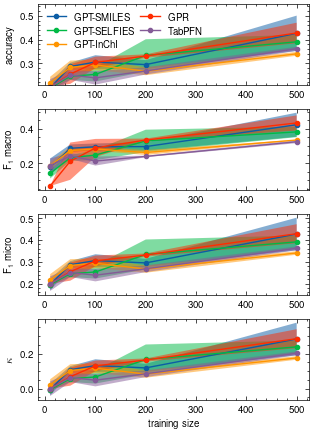

In [147]:
fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH))

# plot the binary case, i.e. num_classes = 2

for i, metric in enumerate(['accuracy', 'f1_macro', 'f1_micro', 'kappa']):
    ax[i].plot(
        grouped_res.loc[5, 'SMILES', :].index,
        grouped_res.loc[5, 'SMILES', :][metric]['mean'],
        marker='o',
        label='GPT-SMILES',
    )
    ax[i].fill_between(
        grouped_res.loc[5, 'SMILES', :].index,
        grouped_res.loc[5, 'SMILES', :][metric]['mean'] - grouped_res.loc[5, 'SMILES', :][metric]['std'],
        grouped_res.loc[5, 'SMILES', :][metric]['mean'] + grouped_res.loc[5, 'SMILES', :][metric]['std'],
        alpha=0.5,
    )

    ax[i].plot(
        grouped_res.loc[5, 'SELFIES', :].index,
        grouped_res.loc[5, 'SELFIES', :][metric]['mean'],
        marker='o',
        label='GPT-SELFIES',
    )
    ax[i].fill_between(
        grouped_res.loc[5, 'SELFIES', :].index,
        grouped_res.loc[5, 'SELFIES', :][metric]['mean'] - grouped_res.loc[5, 'SELFIES', :][metric]['std'],
        grouped_res.loc[5, 'SELFIES', :][metric]['mean'] + grouped_res.loc[5, 'SELFIES', :][metric]['std'],
        alpha=0.5,
    )


    ax[i].plot(
        grouped_res.loc[5, 'InChI', :].index,
        grouped_res.loc[5, 'InChI', :][metric]['mean'],
        marker='o',
        label='GPT-InChI',
    )
    ax[i].fill_between(
        grouped_res.loc[5, 'InChI', :].index,
        grouped_res.loc[5, 'InChI', :][metric]['mean'] - grouped_res.loc[5, 'InChI', :][metric]['std'],
        grouped_res.loc[5, 'InChI', :][metric]['mean'] + grouped_res.loc[5, 'InChI', :][metric]['std'],
        alpha=0.5,
    )

    ax[i].plot(
        grouped_xgboost_res.loc[5,:].index,
        grouped_xgboost_res.loc[5,:][metric]['mean'],
        marker='o',
        label='GPR'
    )
    ax[i].fill_between(
        grouped_xgboost_res.loc[5,:].index,
        grouped_xgboost_res.loc[5,:][metric]['mean'] - grouped_xgboost_res.loc[5,:][metric]['std'],
        grouped_xgboost_res.loc[5,:][metric]['mean'] + grouped_xgboost_res.loc[5,:][metric]['std'],
        alpha=0.5,
    )

    ax[i].plot(
        grouped_tabpfn_res.loc[5,:].index,
        grouped_tabpfn_res.loc[5,:][metric]['mean'],
        marker='o',
        label='TabPFN'
    )
    ax[i].fill_between(
        grouped_tabpfn_res.loc[5,:].index,
        grouped_tabpfn_res.loc[5,:][metric]['mean'] - grouped_tabpfn_res.loc[5,:][metric]['std'],
        grouped_tabpfn_res.loc[5,:][metric]['mean'] + grouped_tabpfn_res.loc[5,:][metric]['std'],
        alpha=0.5,
    )

ax[-1].set_xlabel('training size')
ax[0].legend(ncols=2,columnspacing=.5)
ax[0].set_ylim(0.21,0.55)
ax[0].set_ylabel('accuracy')
ax[1].set_ylabel(r'F$_{1}$ macro')
ax[2].set_ylabel(r'F$_{1}$ micro')
ax[3].set_ylabel(r'$\kappa$')

fig.tight_layout()
fig.savefig('bandgap-classification_results_5_class.pdf', bbox_inches='tight')